In [1]:
import matplotlib.pyplot as plt
import math
import time
import random as rand
import numbers

ModuleNotFoundError: No module named 'matplotlib'

In [32]:
labels = ['smooth','rough', 'scratchy','soft','luster','drape', 'itchy', 'warm','sweat', 'wicking','viscous','stiff']
colors = ['green','red','blue','orange','pink','cyan','purple','brown','gray','olive','black','yellow']
shapes = ['v','^','<','>','o','*','+','d','p','1','2','v']

labelPlotStyle = {}
for k, v in enumerate(labels):
    labelPlotStyle[v] = { 'shape': shapes[k], 'color': colors[k] }

In [33]:
def getRandomList(n, assignLabel):
    newList = []
    maxR = 500
    minR = 0
    maxL = len(labels) - 7
    minL = 0
    for n in range(n):
        x = rand.randint(minR, maxR)
        y = rand.randint(minR, maxR)
        newPoint = (x, y)
        if assignLabel:
            label = labels[rand.randint(minL, maxL)]
            newPoint += (label,)
        newList.append(newPoint)
    return newList

In [34]:
def plot_data_2D(X):
    for x in X:
        if len(x) > 2:
            plt.plot(x[0], x[1], labelPlotStyle[x[2]]['shape'], color=labelPlotStyle[x[2]]['color'])
        else:
            plt.plot(x[0], x[1], 's', color="black")
    plt.show()

In [35]:
def distance_euclidian(a,b):
    sumSq = (a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2
    return math.sqrt(sumSq)

In [36]:
def distance_expensive(a,b):
    time.sleep(.001)
    return distance_euclidian(a,b)

In [37]:
def getDistMatrix(x_list, distance_func):
    distMatrix = []
    for x1 in x_list:
        distances = []
        for x2 in x_list:
            distances.append(round(distance_euclidian(x1, x2), 2))
        distMatrix.append(distances)
    return distMatrix

In [38]:
def oneNNclassifier(X, Y, dist_func):
    distMatrix = getDistMatrix(X, dist_func)
    results = {}
    for y in Y:
        start = time.time()
        distances = {}
        pos_x = {k: v for k, v in enumerate(X)}

        # Step 1. Choose a starting x
        bestx = 0
        while(len(pos_x) != 0):

            # Step 2. Measure the distance between x and y, store for later
            xy_dist = dist_func(pos_x[bestx], y)
            distances[xy_dist] = { 'val': pos_x.pop(bestx), 'position': bestx }
            if len(pos_x) == 0:
                break

            # Step 3. Generate bounds for all other x not yet measured
            inequalities = {}
            for i in pos_x:
                lowerBound = abs(distMatrix[i][bestx] - xy_dist)
                upperBound = distMatrix[i][bestx] + xy_dist
                inequalities[i] = (lowerBound, upperBound)

            # Step 4. Remove any x as a possible match which has a lower bound that is greater than any stored distance
            smallestDist = min(distances)
            for i in inequalities:
                if inequalities[i][0] > smallestDist:
                    pos_x.pop(i)

            #Step 5. If there are no more x values to measure move on to step 6
            # Otherwise choose the x with smallest lower bound and repeat to Step 2. 
            # The closer the point is to y the more we can eliminate. 
            # This is not guaranteed to be closer since the point may move away instead.
            if len(pos_x) == 0:
                break
            bestx = min(inequalities, key=lambda k: inequalities[k][0])
        
        # Step 6. Choose the x that had the smallest distance and label y
        nnDist = min(distances)
        nnValue = distances[nnDist]
        newY = y + ( nnValue['val'][2], )
        end = time.time()
        results[newY] = {'NN': nnValue, 'NN_Dist': nnDist, 'time': end-start, 'All_Dist': distances}
    return results

            

In [39]:
def oneNNclassifierDUMB(X, Y, dist_func):
    results = {}
    for y in Y:
        start = time.time()
        distances = {}
        for i, x in enumerate(X):
            xy_dist = dist_func(x, y)
            distances[xy_dist] = { 'val': x, 'position': i }
        nnDist = min(distances)
        nnValue = distances[nnDist]
        newY = y + ( nnValue['val'][2], )
        end = time.time()
        results[newY] = {'NN': nnValue, 'NN_Dist': nnDist, 'time': end-start, 'All_Dist': distances}
    return results

In [40]:
# Shows results of a point
def display_results(p):
    point = p['NN']['val']
    print('Nearest Point: %s' % str(point))
    print('Position: %s' % str(p['NN']['position']))
    print('Distance: %s' % str(p['NN_Dist']))
    print('Time Taken: %s' % str(p['time']))
    print('Comparisons performed: %s' % str(len(p['All_Dist'])))

    for k,v in p['All_Dist'].items():
        x1 = point[0]
        x2 = v['val'][0]
        y1 = point[1]
        y2 = v['val'][1]
        plt.plot([x1, x2], [y1, y2], '.--', linewidth=2, markersize=12)
    plt.show()

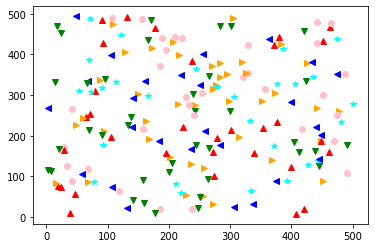

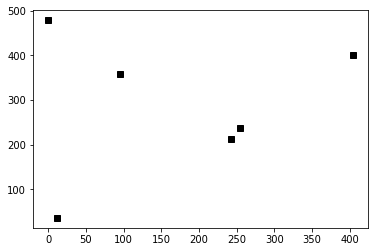

In [41]:
# Generate the data set and plot
T = getRandomList(200, True)
plot_data_2D(T)
P = getRandomList(6, False)
plot_data_2D(P)


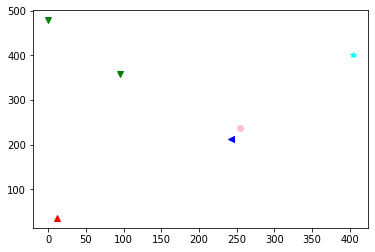

Nearest Point: (259, 213, 'scratchy')
Position: 83
Distance: 17.0
Time Taken: 0.0009400844573974609
Comparisons performed: 7


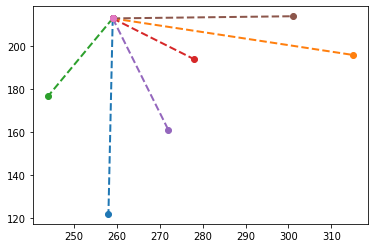

In [42]:
# Classify and show results of better classifier
nnOfP = oneNNclassifier(T, P, distance_expensive)
labeledP = list(nnOfP.keys())
plot_data_2D(labeledP)
# Show the results of a single point of the better classifier
p = nnOfP[labeledP[0]]
display_results(p)


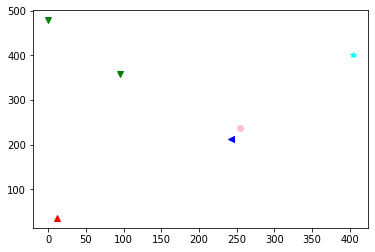

Nearest Point: (259, 213, 'scratchy')
Position: 83
Distance: 17.0
Time Taken: 0.02155780792236328
Comparisons performed: 199


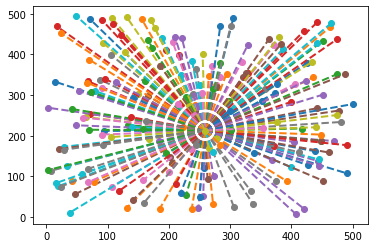

In [43]:
# Classify and show results of dumb classifier
otherNNOfP = oneNNclassifierDUMB(T, P, distance_expensive)
otherLabeledP = list(otherNNOfP.keys())
plot_data_2D(otherLabeledP)
# Show the results of a single point of the dumb classifier
z = otherNNOfP[otherLabeledP[0]]
display_results(z)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


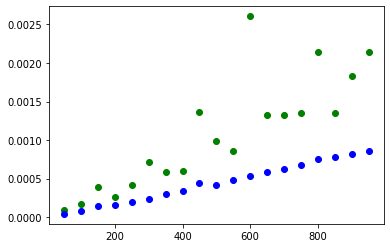

In [44]:
betterOneNNTimes = []
dumbOneNNTimes = []
maxVal = 1000
step = 50
iterations = 3
for i in range(step, maxVal, step):
    print(i)
    avgA = 0
    avgB = 0
    for a in range(iterations):
        X = getRandomList(i, True)
        Y = getRandomList(1, False)
        A = list(oneNNclassifier(X, Y, distance_expensive).values())[0]
        B = list(oneNNclassifierDUMB(X, Y, distance_expensive).values())[0]
        avgA += A['time']
        avgB += B['time']
    betterOneNNTimes.append(avgA / iterations)
    dumbOneNNTimes.append(avgB / iterations)

plt.plot([i for i in range(step, maxVal, step)], betterOneNNTimes, 'o', color='green')
plt.plot([i for i in range(step, maxVal, step)], dumbOneNNTimes, 'o', color='blue')
plt.show()
